##### <h1 style="color:Green;">Week 2 Lecture Source Code</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1IsoKGNILvIqfo_yzBJYTCIf9qg4YysTIOFrJix6jYDI/edit#slide=id.g11b032e97d3_0_0">[Week 2 Lecture Link Here]</a>

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

Specifying stock ticker, start date, and end date. In our example, the stock is apple (Ticker: AAPL).

In [41]:
SYMBOL = 'AAPL' # Stock Ticker symbol
START_DATE = '2016-04-01' # Stock data start date 
END_DATE = '2022-04-01' # Stock data end date 

Extracting ajusted close prices of Apple's stock from Yahoo Finance.

In [42]:
# storing adjusted stock prices into a variable 
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
stockLogRet = np.log(stockPx).diff().dropna()

<h2 style="color:Green;">Probability Review (pg. 3)</h2>

<h3> Probability Distribution Functions (pdf)</h3>

Here, we use our sample mean and standard deviation as those for our theoretical pdf. Note that this is a Normal pdf, but we're going to identify it more succinctly in a short while. For now, just treat this pdf as a random function that output probabilities.

Text(0, 0.5, 'Density')

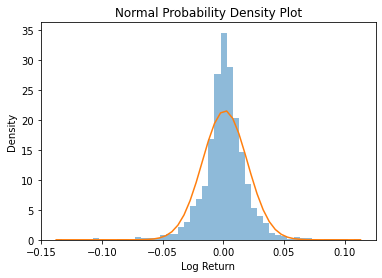

In [43]:
# plotting histogram
_, bins, _= plt.hist(stockLogRet, bins=50, density=1, alpha=0.5)
# specifying distriubtion parameters: mu= mean, sigma= standard deviation
mu, sigma = stats.norm.fit(stockLogRet)
pdf = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, pdf)
plt.title("Histogram of " + SYMBOL + "'s Stock Log Return + Some PDF")
plt.xlabel("Log Return"); plt.ylabel("Density")

<h3>Cumulative Distribution Functions (cdf)</h3>

Text(0, 0.5, 'Density')

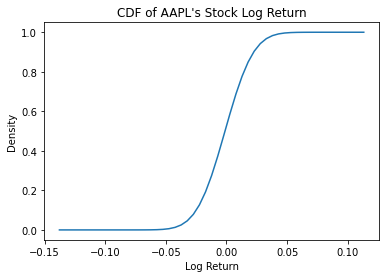

In [6]:
# calculating cumulative probabilities, then visualizing them 
cdf = pdf.cumsum()
cdf /= cdf[-1]
plt.plot(bins, cdf)
plt.title("CDF of " + SYMBOL + "'s Stock Log Return")
plt.xlabel("Log Return"); plt.ylabel("Density")

Finding the probability that apple's log return is less than or equals to -0.005.

In [31]:
from scipy.stats import norm
norm.cdf(-0.005, loc = mu, scale = sigma)

0.36735118542671563

<h3>Summary Statistics</h3>

In [10]:
PAIR = ['ADBE','CMG'] # Enter the two ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance

In [12]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
stockPxPair = pdr.DataReader(PAIR, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetPair = np.log(stockPxPair).diff().dropna()

ADBE vs CMG's daily log returns summary statistics 

The table values by the time you run this may be different than those in the lecture slides because this table produces summary statistics from the rolling 5 years data (set via the `TAU` variable), so everyday a new data point is observed and the oldest data point is removed.

In [13]:
sum_stats = pd.DataFrame({'mean':stockLogRetPair.mean(), 'sd': stockLogRetPair.std(), 'skewness':stockLogRetPair.skew(), 'excess kurtosis':stockLogRetPair.kurtosis()})
sum_stats 

,mean,sd,skewness,excess kurtosis
Symbols,,,,
ADBE,0.000881,0.021993,-0.251249,7.652122
CMG,0.000898,0.023865,0.639988,12.432202


<h2 style="color:Green;">Simulating Probability Distributions - Theoretical (pg. 13)</h2>

<h3>Normal Distribution</h3>

We call normal distributions with 0 mean and 1 standard deviation a "Standard Normal Distribution", and those with other mean and standard deviation values just a "Normal Distribution".

Text(0, 0.5, 'Density')

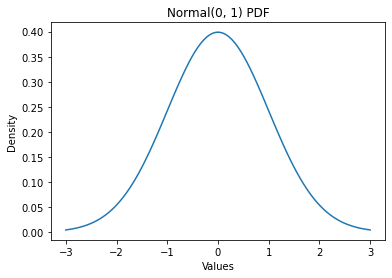

In [14]:
mu = 0  # defining mean parameter
sigma = 1 # defining standard deviation parameter
# Notice that this is a Standard Normal Distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='normal pdf')
plt.title("Normal("+str(mu)+', '+str(sigma)+") PDF")
plt.xlabel("Values"); plt.ylabel("Density")

<h3>Uniform Distribution</h3>

Text(0, 0.5, 'Density')

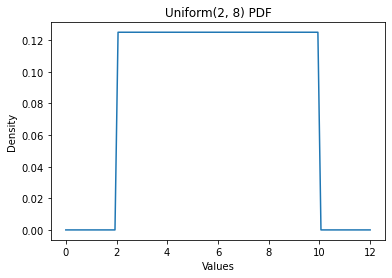

In [15]:
from scipy.stats import uniform
a, b = 2, 8
x = np.linspace(0, 12, 100)
plt.plot(x, uniform.pdf(x, a, b), label='uniform pdf')
plt.title("Uniform("+str(a)+', '+str(b)+") PDF")
plt.xlabel("Values"); plt.ylabel("Density")

<h3>Exponential Distribution</h3>

Text(0, 0.5, 'Density')

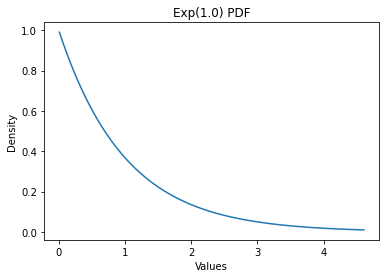

In [16]:
from scipy.stats import expon
mean, var, skew, kurt = expon.stats(moments='mvsk')
x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x),label='expon pdf')
plt.title("Exp("+str(np.round(1/np.sqrt(var)))+") PDF")
plt.xlabel("Values"); plt.ylabel("Density")

<h3>Double Exponential (Laplace) Distribution</h3>

Text(0, 0.5, 'Density')

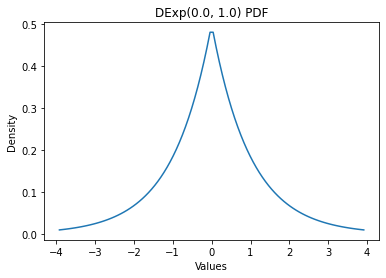

In [17]:
from scipy.stats import laplace
mean, var, skew, kurt = laplace.stats(moments='mvsk')
x = np.linspace(laplace.ppf(0.01),laplace.ppf(0.99), 100)
plt.plot(x, laplace.pdf(x), label='laplace pdf')
plt.title("DExp("+str(np.round(mean))+', '+str(np.round(1/np.sqrt(var/2)))+") PDF")
plt.xlabel("Values"); plt.ylabel("Density")

<h3>Student-t Distribution</h3>

Text(0, 0.5, 'Density')

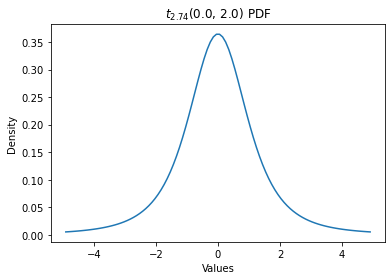

In [18]:
from scipy.stats import t
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df), label='t pdf')
plt.title("$t_{2.74}$("+str(np.round(mean))+', '+str(np.round(np.sqrt(var)))+") PDF")
plt.xlabel("Values"); plt.ylabel("Density")

Watch how the student-t distribution change with the degrees of freedom.

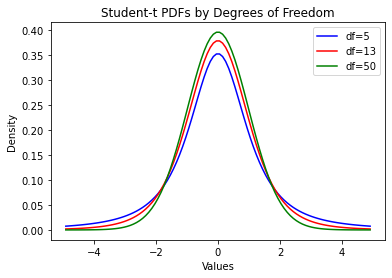

In [19]:
plt.plot(x, t.pdf(x, 2), label='df=5', color="b")
plt.plot(x, t.pdf(x, 5), label='df=13', color="r")
plt.plot(x, t.pdf(x, 50), label='df=50', color="g")
plt.title("Student-t PDFs by Degrees of Freedom")
plt.xlabel("Values"); plt.ylabel("Density")
plt.legend()

<h3>Quantile-Quantile (QQ) Plots</h3>

Text(0.5, 1.0, "Normal QQ Plot of AAPL's Stock Log Return")

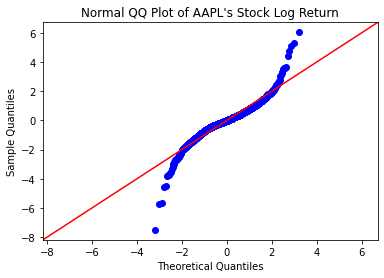

In [20]:
# theoretical quantiles refers to the real Normal distribution
# sample quantiles refers to our sample distribution
import statsmodels.api as sm
sm.qqplot(stockLogRet, stats.norm, fit=True, line='45')
plt.title("Normal QQ Plot of " + SYMBOL + "'s Stock Log Return")

<h2 style="color:Green;">Fitting Probability Distributions to AAPL's Log Returns- Application (pg. 27)</h2>

<h3>Comparing Distribution Fits with PDFs</h3>

The normal curve sems to fit the left and right tails decently but missed the peak by a huge amount; there would be a major inaccuracy in the central region if we use this distribution for inference, hence we set aside it as a loser. Similar case for the uniform curve, which stays flat for all log return values and did not capture the the histogram on its left tail, peak, and right tail, hence making it a clear loser. The double exponential and student-t curve seems to trace the histogram from the left extreme values to the right extreme values, including the peak, hence we select them as the best candidates for modeling AAPL's daily log returns.

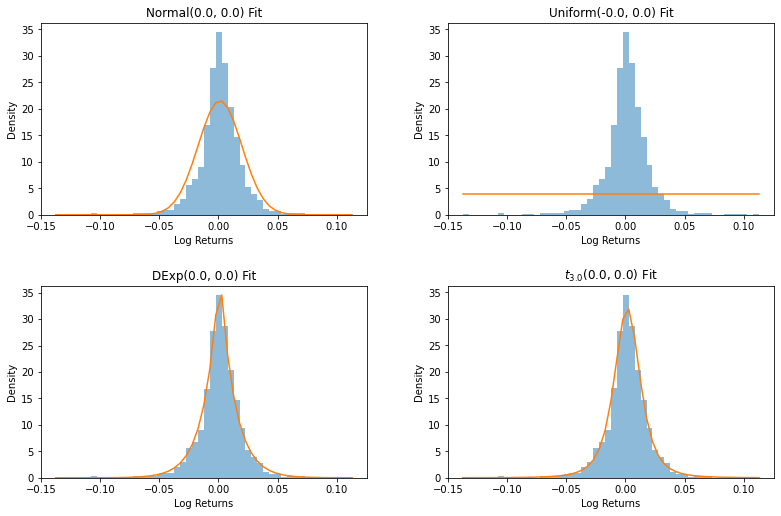

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout(pad=5)

# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0, 0].hist(stockLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(stockLogRet)
axs[0, 0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0, 0].set_title("Normal("+str(np.round(mu))+', '+str(np.round(sigma))+") Fit")

#---------------------------w/ Uniform PDF-----------------------------
axs[0, 1].hist(stockLogRet, bins=50, density=1, alpha=0.5)
a, b = stats.uniform.fit(stockLogRet)
axs[0, 1].plot(bins, uniform.pdf(bins, a, b), label='uniform pdf')
axs[0, 1].set_title("Uniform("+str(np.round(a))+', '+str(np.round(b))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1, 0].hist(stockLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(stockLogRet)
axs[1, 0].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1, 0].set_title("DExp("+str(np.round(loc_dexp))+', '+str(np.round(scale_dexp))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[1, 1].hist(stockLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(stockLogRet)
axs[1, 1].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[1, 1].set_title("$t_{"+str(np.round(df_t))+"}$"+"("+str(np.round(loc_t))+', '+str(np.round(scale_t))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')


<h3>Comparing Distribution Fits with QQ Plots</h3>

To differentiate a clear winner distribution, we have to look at the QQ plots. From the QQ plots, the tail quantiles of AAPL's daily log returns seems to deviate drastically from those of the the normal and uniform distributions. This consolidates our conclusion from the probability densities above that normal and uniform curves are poor candidates for inference. The middle quantiles of the log returns seem fairly close to those of the double exponential and student-t distributions, but their left and right tails are closer to the those of a student-t distribution (further quantiles are close to the red line). Hence, we select student-t as the best distribution for modeling AAPL's daily log returns.

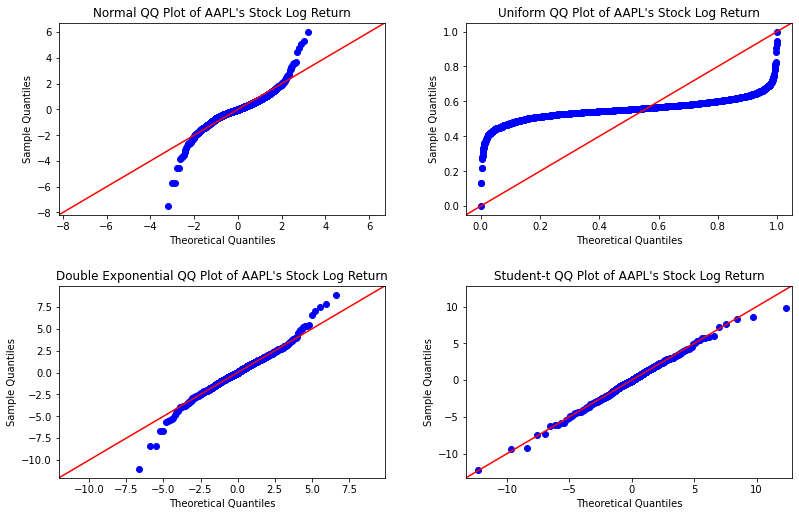

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=5)
#---------------------------w/ Normal QQ Plot-----------------------------
sm.qqplot(stockLogRet, stats.norm, fit=True, line='45', ax=axs[0,0])
axs[0,0].set_title("Normal QQ Plot of " + SYMBOL + "'s Stock Log Return")

#---------------------------w/ Uniform QQ Plot-----------------------------
sm.qqplot(stockLogRet, stats.uniform, fit=True, line='45', ax=axs[0,1])
axs[0,1].set_title("Uniform QQ Plot of " + SYMBOL + "'s Stock Log Return")

#---------------------------w/ Double Exponential QQ Plot-----------------------------
sm.qqplot(stockLogRet, stats.laplace, fit=True, line='45', ax=axs[1,0])
axs[1,0].set_title("Double Exponential QQ Plot of " + SYMBOL + "'s Stock Log Return")

#---------------------------w/ Student-t QQ Plot-----------------------------
sm.qqplot(stockLogRet, stats.t, fit=True, line='45', ax=axs[1,1])
axs[1,1].set_title("Student-t QQ Plot of " + SYMBOL + "'s Stock Log Return")

for ax in axs.flat:
    ax.set(xlabel='Theoretical Quantiles', ylabel='Sample Quantiles')

<h2 style="color:Green;">Risk Profiling (pg. 33)</h2>

<h3>Value-at-Risk (VaR)</h3>
We calculate the VaR using the Historical Simulation approach.<br>
The rVaR_10, rVaR_5, and rVaR_1 are the sorted returns corresponding to the 10%, 5% and 1% of the total trading days, respectively. This means that there is a 10% probability that the portfolio will lose at least rVaR_10, 5% probability that the portfolio will lose at least rVaR_5, and 1% probability that the portfolio will lose at least rVaR_1. 

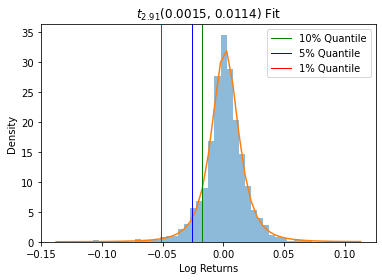

In [34]:
# plotting histogram
plt.hist(stockLogRet, bins=50, density=1, alpha=0.5)
df, loc, scale = stats.t.fit(stockLogRet)
plt.plot(bins, t.pdf(bins, df, loc, scale))
plt.title("$t_{"+str(np.round(df,2))+"}$"+"("+str(np.round(loc,4))+', '+str(np.round(scale,4))+") Fit")
plt.xlabel("Log Returns"); plt.ylabel("Density")

# calculating 10%, 5%, 1% quantiles
quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)

# calculating 10%, 5%, 1% VaR
rVaR_10 = -(np.exp(quantile_10)-1)
rVaR_5 = -(np.exp(quantile_5)-1)
rVaR_1 = -(np.exp(quantile_1)-1)

# plotting the cutoff of VaR
plt.axvline(quantile_10, color='green', linewidth=1, label='10% Quantile')
plt.axvline(quantile_5, color='blue', linewidth=1, label='5% Quantile')
plt.axvline(quantile_1, color='red', linewidth=1, label='1% Quantile')
plt.legend()

<h3>Relative Value-at-Risk (rVaR) Table</h3>

In [25]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1]})

,Significance Level,Quantile,rVaR
0,10%,-0.017353,0.017203
1,5%,-0.025698,0.025371
2,1%,-0.051582,0.050274


You can also shade the area to represent the probability region.

Text(0, 0.5, 'Density')

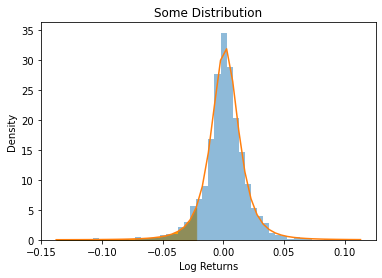

In [35]:
#  shading probability region of the 90% VaR
plt.hist(stockLogRet, bins=50, density=1, alpha=0.5)
df, loc, scale = stats.t.fit(stockLogRet)
plt.plot(bins, t.pdf(bins, df_t, loc_t, scale_t))
plt.fill_between(bins,t.pdf(bins, df_t, loc_t, scale_t), where = bins <=quantile_10, color='orange')
plt.title("Some Distribution") # this is a t-distribution, but I call it "some distribution" for generalization
plt.xlabel("Log Returns"); plt.ylabel("Density")

<h3>Expected Shorthall (ES) - Monte-Carlo Simulation</h3>

Sample 1e7 losses from the student-t distribution (sample size needs to be at least 5000 to be accurate), $t_{2.91}(0.0015,0.011)$. This is called Monte Carlo simulation. Through large samples, we expect the distribution of the sampled points converge to the student-t distribution. 

In [36]:
import random
random.seed(10)

# simulating losses/ log returns
simLoss = -(np.exp(t.rvs(df=df_t, loc=loc_t, scale=scale_t, size=10000000))-1)

<h3>Relative Expected Shorthall Table(rES)

In [37]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])
rES_5 = np.mean(simLoss[simLoss>rVaR_5])
rES_1 = np.mean(simLoss[simLoss>rVaR_1])

In [38]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

,Significance Level,Quantile,rVaR,rES
0,10%,-0.017353,0.017203,0.031636
1,5%,-0.025698,0.025371,0.042478
2,1%,-0.051582,0.050274,0.077133


You can also shade the area to represent the probability regions.

Text(0, 0.5, 'Density')

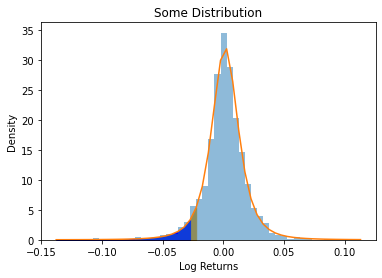

In [39]:
#  shading probability region of the 90% VaR
plt.hist(stockLogRet, bins=50, density=1, alpha=0.5)
df, loc, scale = stats.t.fit(stockLogRet)
plt.plot(bins, t.pdf(bins, df_t, loc_t, scale_t))
plt.fill_between(bins,t.pdf(bins, df_t, loc_t, scale_t), where = bins <=quantile_10, color='orange')
plt.fill_between(bins,t.pdf(bins, df_t, loc_t, scale_t), where = bins <=quantile_5, color='blue')
plt.title("Some Distribution") # this is a t-distribution, but I call it "some distribution" for generalization
plt.xlabel("Log Returns"); plt.ylabel("Density")